In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

def objective(x):
    """Objective function to minimize"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Return the value of the polynomial
    return f(x) * 0.05

Minimum of -219.8012 occurs at 4.8779


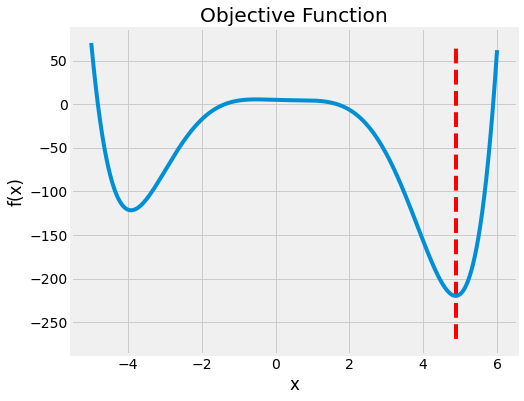

In [3]:
# Space over which to evluate the function is -5 to 6
x = np.linspace(-5, 6, 10000)
y = objective(x)

miny = min(y)
minx = x[np.argmin(y)]

# Visualize the function
plt.figure(figsize = (8, 6))
plt.style.use('fivethirtyeight')
plt.title('Objective Function'); plt.xlabel('x'); plt.ylabel('f(x)')
plt.vlines(minx, min(y)- 50, max(y), linestyles = '--', colors = 'r')
plt.plot(x, y)

# Print out the minimum of the function and value
print('Minimum of %0.4f occurs at %0.4f' % (miny, minx))

In [4]:
from hyperopt import hp

# Create the domain space
space = hp.uniform('x', -5, 6)

Text(0.5, 1.0, 'Domain Space')

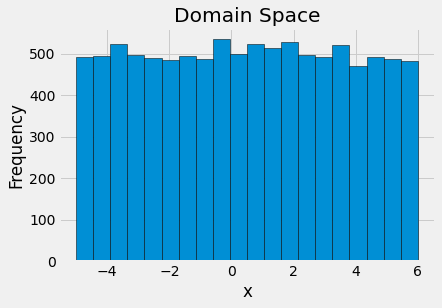

In [6]:
from hyperopt.pyll.stochastic import sample


samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x')
plt.ylabel('Frequency')
plt.title('Domain Space')

In [7]:

from hyperopt import rand, tpe

# Create the algorithms
tpe_algo = tpe.suggest
rand_algo = rand.suggest

In [8]:
from hyperopt import Trials

# Create two trials objects
tpe_trials = Trials()
rand_trials = Trials()

In [9]:
from hyperopt import fmin

# Run 2000 evals with the tpe algorithm
tpe_best = fmin(fn=objective, space=space, algo=tpe_algo, trials=tpe_trials, 
                max_evals=2000, rstate= np.random.RandomState(50))

print(tpe_best)

# Run 2000 evals with the random algorithm
rand_best = fmin(fn=objective, space=space, algo=rand_algo, trials=rand_trials, 
                 max_evals=2000, rstate= np.random.RandomState(50))

100%|██████████| 2000/2000 [00:20<00:00, 97.84trial/s, best loss: -219.80118811219114]
{'x': 4.878481851906148}
100%|██████████| 2000/2000 [00:06<00:00, 327.17trial/s, best loss: -219.80116907646868]


In [10]:
# Print out information about losses
print('Minimum loss attained with TPE:    {:.4f}'.format(tpe_trials.best_trial['result']['loss']))
print('Minimum loss attained with random: {:.4f}'.format(rand_trials.best_trial['result']['loss']))
print('Actual minimum of f(x):            {:.4f}'.format(miny))

# Print out information about number of trials
print('\nNumber of trials needed to attain minimum with TPE:    {}'.format(tpe_trials.best_trial['misc']['idxs']['x'][0]))
print('Number of trials needed to attain minimum with random: {}'.format(rand_trials.best_trial['misc']['idxs']['x'][0]))

# Print out information about value of x
print('\nBest value of x from TPE:    {:.4f}'.format(tpe_best['x']))
print('Best value of x from random: {:.4f}'.format(rand_best['x']))
print('Actual best value of x:      {:.4f}'.format(minx))

Minimum loss attained with TPE:    -219.8012
Minimum loss attained with random: -219.8012
Actual minimum of f(x):            -219.8012

Number of trials needed to attain minimum with TPE:    655
Number of trials needed to attain minimum with random: 235

Best value of x from TPE:    4.8785
Best value of x from random: 4.8776
Actual best value of x:      4.8779


In [11]:
%%timeit -n 3
# Run 2000 evals with the tpe algorithm
best = fmin(fn=objective, space=space, algo=tpe_algo, max_evals=200)

100%|██████████| 200/200 [00:01<00:00, 189.42trial/s, best loss: -219.80035268120588]
972 ms ± 97.4 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [12]:
%%timeit -n 3

# Run 2000 evals with the random algorithm
best = fmin(fn=objective, space=space, algo=rand_algo, max_evals=200)

100%|██████████| 200/200 [00:00<00:00, 1237.14trial/s, best loss: -219.78052124418878]
201 ms ± 44.7 ms per loop (mean ± std. dev. of 7 runs, 3 loops each)


In [13]:
tpe_results = pd.DataFrame({'loss': [x['loss'] for x in tpe_trials.results], 'iteration': tpe_trials.idxs_vals[0]['x'],
                            'x': tpe_trials.idxs_vals[1]['x']})
                            
tpe_results.head()

,loss,iteration,x
0,36.210073,0,5.957885
1,-202.384052,1,4.470885
2,-75.519449,2,3.218963
3,5.543552,3,-0.515859
4,35.078011,4,-4.916832


In [14]:
tpe_results['rolling_average_x'] = tpe_results['x'].rolling(50).mean().fillna(method = 'bfill')
tpe_results['rolling_average_loss'] = tpe_results['loss'].rolling(50).mean().fillna(method = 'bfill')
tpe_results.head()

,loss,iteration,x,rolling_average_x,rolling_average_loss
0,36.210073,0,5.957885,2.105103,-74.393795
1,-202.384052,1,4.470885,2.105103,-74.393795
2,-75.519449,2,3.218963,2.105103,-74.393795
3,5.543552,3,-0.515859,2.105103,-74.393795
4,35.078011,4,-4.916832,2.105103,-74.393795


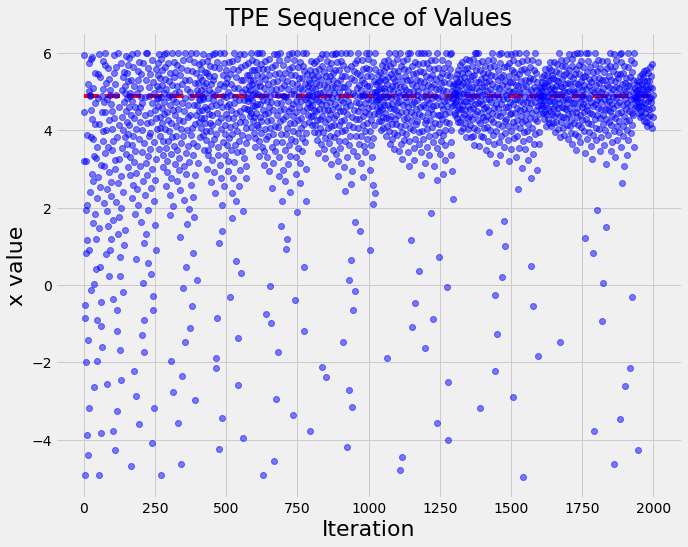

In [15]:
plt.figure(figsize = (10, 8))
plt.plot(tpe_results['iteration'], tpe_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('TPE Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

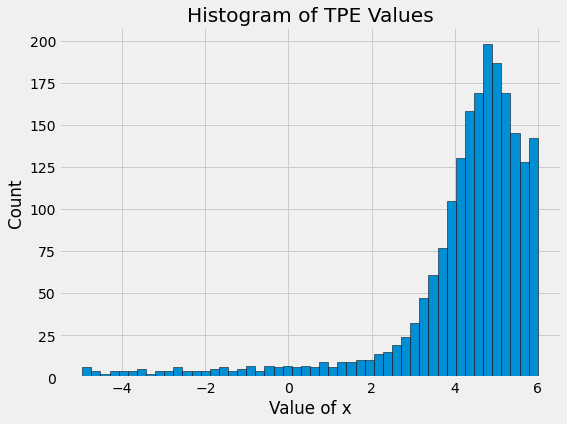

In [16]:
plt.figure(figsize = (8, 6))
plt.hist(tpe_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

Best Loss of -219.8012 occured at iteration 655


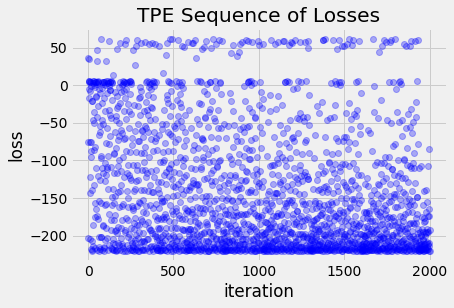

In [17]:

# Sort with best loss first
tpe_results = tpe_results.sort_values('loss', ascending = True).reset_index()

plt.plot(tpe_results['iteration'], tpe_results['loss'], 'bo', alpha = 0.3);
plt.xlabel('iteration'); plt.ylabel('loss'); plt.title('TPE Sequence of Losses');

print('Best Loss of {:.4f} occured at iteration {}'.format(tpe_results['loss'][0], tpe_results['iteration'][0]))

In [18]:
rand_results = pd.DataFrame({'loss': [x['loss'] for x in rand_trials.results], 'iteration': rand_trials.idxs_vals[0]['x'],
                            'x': rand_trials.idxs_vals[1]['x']})
                            
rand_results.head()

,loss,iteration,x
0,36.210073,0,5.957885
1,-202.384052,1,4.470885
2,-75.519449,2,3.218963
3,5.543552,3,-0.515859
4,35.078011,4,-4.916832


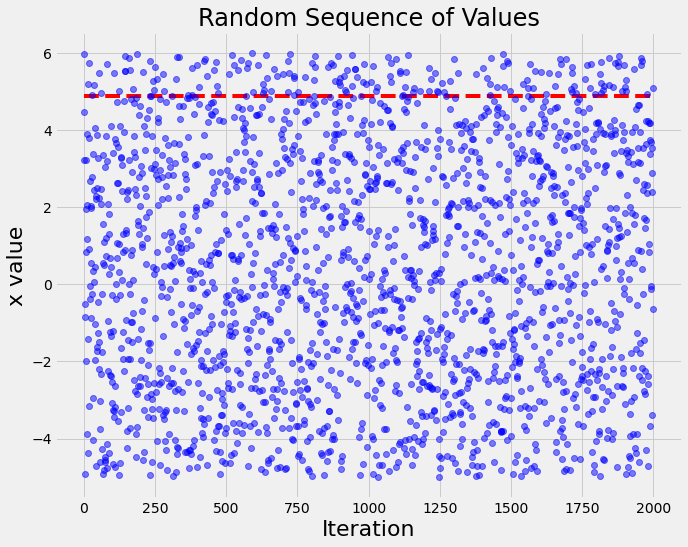

In [19]:

plt.figure(figsize = (10, 8))
plt.plot(rand_results['iteration'], rand_results['x'],  'bo', alpha = 0.5);
plt.xlabel('Iteration', size = 22); plt.ylabel('x value', size = 22); plt.title('Random Sequence of Values', size = 24);
plt.hlines(minx, 0, 2000, linestyles = '--', colors = 'r');

Best Loss of -219.8012 occured at iteration 235


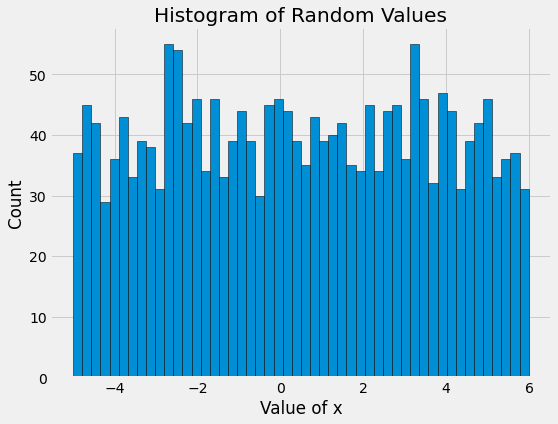

In [20]:
# Sort with best loss first
rand_results = rand_results.sort_values('loss', ascending = True).reset_index()

plt.figure(figsize = (8, 6))
plt.hist(rand_results['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of Random Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

# Print information
print('Best Loss of {:.4f} occured at iteration {}'.format(rand_results['loss'][0], rand_results['iteration'][0]))

# Another Domain Space

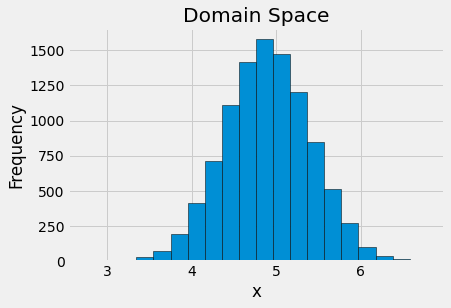

In [21]:
# Normally distributed space
space = hp.normal('x', 4.9, 0.5)

samples = []

# Sample 10000 values from the range
for _ in range(10000):
    samples.append(sample(space))
    

# Histogram of the values
plt.hist(samples, bins = 20, edgecolor = 'black'); 
plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

In [22]:

from hyperopt import STATUS_OK
from timeit import default_timer as timer

def objective(x):
    """Objective function to minimize with smarter return values"""
    
    # Create the polynomial object
    f = np.poly1d([1, -2, -28, 28, 12, -26, 100])

    # Evaluate the function
    start = timer()
    loss = f(x) * 0.05
    end = timer()
    
    # Calculate time to evaluate
    time_elapsed = end - start
    
    results = {'loss': loss, 'status': STATUS_OK, 'x': x, 'time': time_elapsed}
    
    # Return dictionary
    return results

In [23]:
# New trials object
trials = Trials()

# Run 2000 evals with the tpe algorithm
best = fmin(fn=objective, space=space, algo=tpe_algo, trials=trials, 
                max_evals=2000, rstate= np.random.RandomState(120))

100%|██████████| 2000/2000 [00:14<00:00, 137.23trial/s, best loss: -219.80120395524256]


In [24]:
results = trials.results
results[:2]

[{'loss': -189.3682041842684,
  'status': 'ok',
  'x': 5.312379584994148,
  'time': 6.180000002586894e-05},
 {'loss': -219.325099632915,
  'status': 'ok',
  'x': 4.8166084516702705,
  'time': 5.270000008295028e-05}]

In [25]:
# Results into a dataframe
results_df = pd.DataFrame({'time': [x['time'] for x in results], 
                           'loss': [x['loss'] for x in results],
                           'x': [x['x'] for x in results],
                            'iteration': list(range(len(results)))})

# Sort with lowest loss on top
results_df = results_df.sort_values('loss', ascending = True)
results_df.head()

,time,loss,x,iteration
956,0.000021,-219.801204,4.878152,956
1316,0.000040,-219.801204,4.878111,1316
402,0.000024,-219.801204,4.878189,402
914,0.000046,-219.801203,4.878064,914
1954,0.000046,-219.801203,4.878222,1954


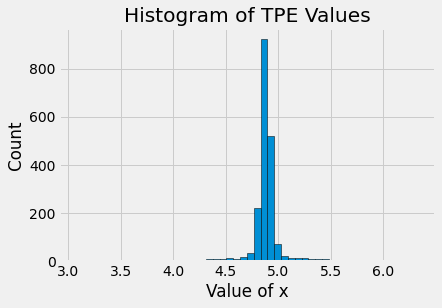

In [26]:
plt.hist(results_df['x'], bins = 50, edgecolor = 'k');
plt.title('Histogram of TPE Values'); plt.xlabel('Value of x'); plt.ylabel('Count');

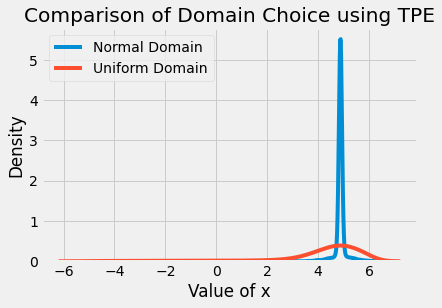

In [27]:
sns.kdeplot(results_df['x'], label = 'Normal Domain')
sns.kdeplot(tpe_results['x'], label = 'Uniform Domain')
plt.legend(); plt.xlabel('Value of x'); plt.ylabel('Density'); plt.title('Comparison of Domain Choice using TPE');

In [28]:
print('Lowest Value of the Objective Function = {:.4f} at x = {:.4f} found in {:.0f} iterations.'.format(results_df['loss'].min(),
                                                                             results_df.loc[results_df['loss'].idxmin()]['x'],
                                                                             results_df.loc[results_df['loss'].idxmin()]['iteration']))

Lowest Value of the Objective Function = -219.8012 at x = 4.8782 found in 956 iterations.


In [29]:

# Just because you can do it in one line doesn't mean you should! 
best = fmin(fn = lambda x: np.poly1d([1, -2, -28, 28, 12, -26, 100])(x) * 0.05,
            space = hp.normal('x', 4.9, 0.5), algo=tpe.suggest, 
            max_evals = 2000)

best

100%|██████████| 2000/2000 [00:15<00:00, 126.92trial/s, best loss: -219.801203818918]


{'x': 4.878094072715777}

- Objective: what we want to minimize
- Domain: values of the parameters over which to minimize the objective
- Hyperparameter optimization function: how the surrogate function is built and the next values are proposed
Trials consisting of score, parameters pairs

The differences between random search and and Sequential Model-Based Optimization is clear: random search is uninformed and therefore requires more trials to minimize the objective function. The Tree Parzen Estimator, an algorithm used for SMBO, spends more time choosing the next values, but overall requires fewer evaluations of the objective function because it is able to reason about the next values to evaluate. Over many iterations, SMBO algorithms concentrate the search around the most promising values, yielding:

- Lower scores on the objective function
- Faster optimization
Bayesian model-based optimiziation means construction a probability model $p(y | x)$ of the objective function and updating this model as more information is collected. As the number of evaluations increases, the model (also called a surrogate function) becomes a more accurate respresentation of the objective function and the algorithm spends more time evaluating promising values.

This notebook showed a the basic implementation of Bayesian Model-Based optimization using Hyperopt, but already we can see how it has significant advantages over random or grid search based methods. In future notebooks we will explore using Bayesian model-based optimization on more complex problems, namely hyperparameter optimization of machine learning models.